# Week 3, HW 12 "Linear Regression Analyse"

In [ ]:
# Import required libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Load dataset 
df = pd.read_csv("Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [3]:
# Identify variable names in the dataset
SAL_COL = "sal_psu"           # salinity (PSU)
TEMP_COL = "temp_c"           # temperature (°C)
DIC_COL  = "dic_micromol_kg"  # DIC (µmol/kg)

In [4]:
for col in [SAL_COL, TEMP_COL, DIC_COL]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=[SAL_COL, TEMP_COL, DIC_COL])


=== Linear Regression: Temperature ~ Salinity ===
                            OLS Regression Results                            
Dep. Variable:                 temp_c   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     22.44
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           6.88e-06
Time:                        21:57:03   Log-Likelihood:                -130.39
No. Observations:                 106   AIC:                             264.8
Df Residuals:                     104   BIC:                             270.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

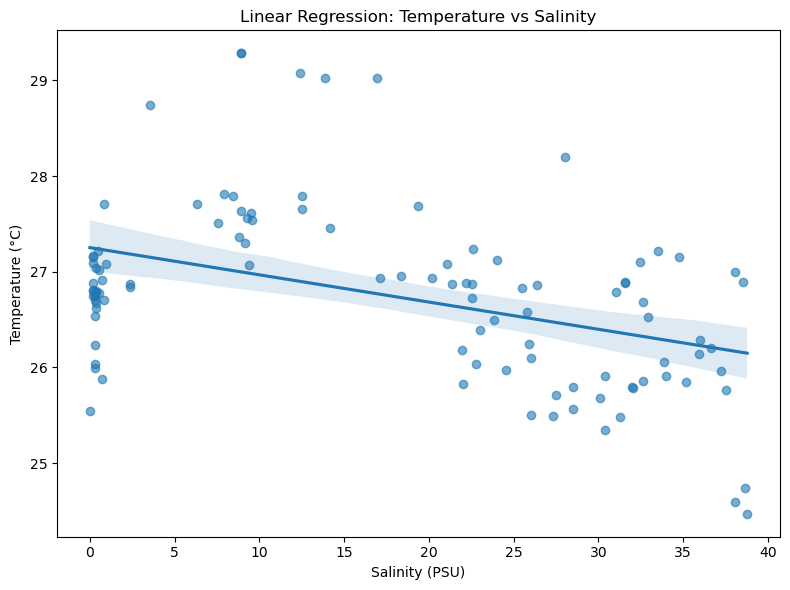

In [5]:
# 1) Linear Regression: Temperature ~ Salinity
print("\n=== Linear Regression: Temperature ~ Salinity ===")

# Fit regression model
model_temp_sal = ols(f"{TEMP_COL} ~ {SAL_COL}", data=df).fit()

# Print regression summary
print(model_temp_sal.summary())

# Scatterplot with regression line
plt.figure(figsize=(8,6))
sns.regplot(data=df, x=SAL_COL, y=TEMP_COL, scatter_kws={"alpha":0.6})
plt.title("Linear Regression: Temperature vs Salinity")
plt.xlabel("Salinity (PSU)")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


=== Linear Regression: DIC ~ Salinity ===
                            OLS Regression Results                            
Dep. Variable:        dic_micromol_kg   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     50.56
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           1.51e-10
Time:                        21:57:26   Log-Likelihood:                -787.63
No. Observations:                 106   AIC:                             1579.
Df Residuals:                     104   BIC:                             1585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

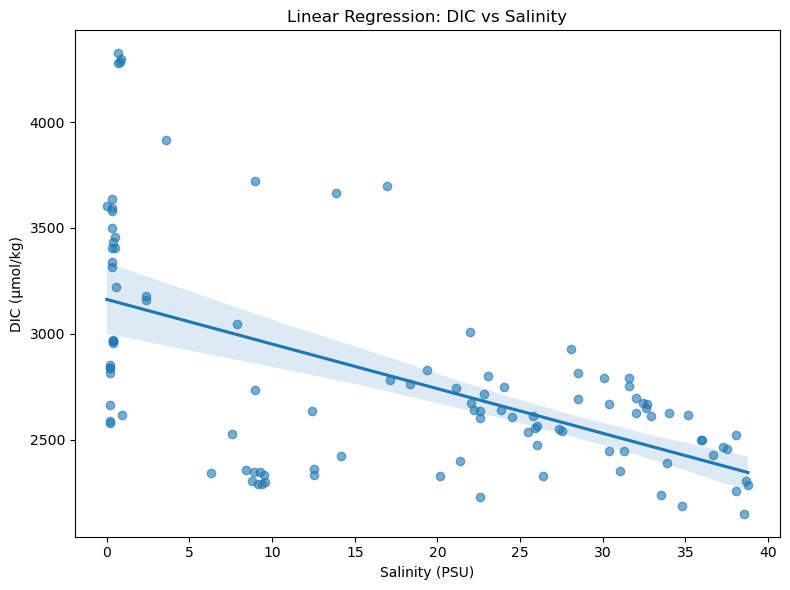

In [6]:
# 2) Linear Regression: DIC ~ Salinity
print("\n=== Linear Regression: DIC ~ Salinity ===")

# Fit regression model
model_dic_sal = ols(f"{DIC_COL} ~ {SAL_COL}", data=df).fit()

# Print regression summary
print(model_dic_sal.summary())

# Scatterplot with regression line
plt.figure(figsize=(8,6))
sns.regplot(data=df, x=SAL_COL, y=DIC_COL, scatter_kws={"alpha":0.6})
plt.title("Linear Regression: DIC vs Salinity")
plt.xlabel("Salinity (PSU)")
plt.ylabel("DIC (µmol/kg)")
plt.tight_layout()
plt.show()

# Temperature ~ Salinity
- R-squared = 0.177. About 17.7% of the variance in temperature can be explained by salinity.
- F = 22.44, p < 0.001. The model is statistically significant overall. This means that salinity provides a significant contribution in explaining temperature variation.
There is a significant negative relationship between salinity and temperature. When salinity increases, water temperature tends to decrease slightly. But salinity explains only 18% of the variability in temperature, so other enviromental process are also important. 

# DIC ~ Salinity
- R-squared = 0.327. About 32.7% of the variance in DIC is explained by salinity.
- F = 50.56, p < 0.001. The regression model is highly significant overall. The salinity is strong predictor of DIC. 
There is a statistically significant negative relationship between salinity and DIC. Where salinity increases, DIC concentration decrease susbtantially. Salinity explains one-third of the variation in DIC, which is moderate explanatory power. 